#  IPL Data Analysis (2008–2019)

##  Introduction
The Indian Premier League (IPL) is one of the most popular Twenty20 (T20) cricket leagues in the world, featuring top players from various countries.  
This project analyzes IPL data from 2008 to 2019 to uncover insights into team performances, player statistics, venues, and match trends.

##  Objectives
- Explore and clean IPL datasets (`matches.csv` and `deliveries.csv`).
- Perform **Exploratory Data Analysis (EDA)** to identify key patterns.
- Answer cricket-related questions like:
  - Which team has won the most matches?
  - Does winning the toss give an advantage?
  - Who are the top batsmen and bowlers?
  - Which venues host the most matches?

##  Datasets Used
1. **matches.csv** → Contains match-level details such as date, teams, venue, toss, winner, etc.  
2. **deliveries.csv** → Contains ball-by-ball details such as batsman, bowler, runs scored, dismissals, etc.

##  Tools & Libraries
- **Python** → Pandas, Matplotlib, Seaborn  
- **Jupyter Notebook** for analysis and visualization  

---


In [1]:
# Import the main Library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load Datasets

In [2]:
matches = pd.read_csv("matches.csv")
deliveries = pd.read_csv("deliveries.csv")

In [3]:
print("\nMatches Dataset:\n")
matches.head()


Matches Dataset:



,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
print("Columns of Matches:\n")
matches.columns

Columns of Matches:



Index(['id', 'Season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [5]:
print("\nDeliveries Dataset:\n")
deliveries.head()


Deliveries Dataset:



,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [6]:
print("Columns of Deliveries:\n")
matches.columns

Columns of Deliveries:



Index(['id', 'Season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

### Basic Info

In [7]:
# Check the shape of the Data 
print("Matches-")
print("The number of rows is:", matches.shape[0])
print("The number of columns is:", matches.shape[1])

Matches-
The number of rows is: 756
The number of columns is: 18


In [8]:
# Check the shape of the Data
print("Deliveries-")
print("The number of rows is:", deliveries.shape[0])
print("The number of columns is:", deliveries.shape[1])

Deliveries-
The number of rows is: 179078
The number of columns is: 21


In [9]:
print("Matches Dataset info:")
matches.info()
print("\nDeliveries Dataset info:")
deliveries.info()

Matches Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   Season           756 non-null    object
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3      

### Missing Value Check

In [10]:
print("\nMissing Values in Matches Dataset:")
print(matches.isnull().sum())

print("\nMissing Values in Deliveries Dataset:")
print(deliveries.isnull().sum())


Missing Values in Matches Dataset:
id                   0
Season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

Missing Values in Deliveries Dataset:
match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismi

## Basic Stats

In [11]:
print("\nTotal Matches Played:",matches.shape[0])
print("\nTotal Seasons:", matches['Season'].nunique())
print("\nTotal Cities:", matches['city'].nunique())


Total Matches Played: 756

Total Seasons: 12

Total Cities: 32


### Team Performance

In [12]:
print("\nMost Winning Team Overall:")
print(matches['winner'].value_counts().head(1))
print("\nSeason-wise Winners:")
print(matches.groupby("Season")['winner'].agg(lambda x: x.value_counts().index[0]))


Most Winning Team Overall:
winner
Mumbai Indians    109
Name: count, dtype: int64

Season-wise Winners:
Season
IPL-2008         Rajasthan Royals
IPL-2009         Delhi Daredevils
IPL-2010           Mumbai Indians
IPL-2011      Chennai Super Kings
IPL-2012    Kolkata Knight Riders
IPL-2013           Mumbai Indians
IPL-2014          Kings XI Punjab
IPL-2015      Chennai Super Kings
IPL-2016      Sunrisers Hyderabad
IPL-2017           Mumbai Indians
IPL-2018      Chennai Super Kings
IPL-2019           Mumbai Indians
Name: winner, dtype: object


In [13]:
matches['toss_match_win']= matches['toss_winner']== matches['winner']
toss_win_rate=matches['toss_match_win'].mean()*100
print(f"\n Toss Win & Match Win Relation:{toss_win_rate:.2f
}% times toss winner also won the match")
      



 Toss Win & Match Win Relation:51.98% times toss winner also won the match


### Venue Insight

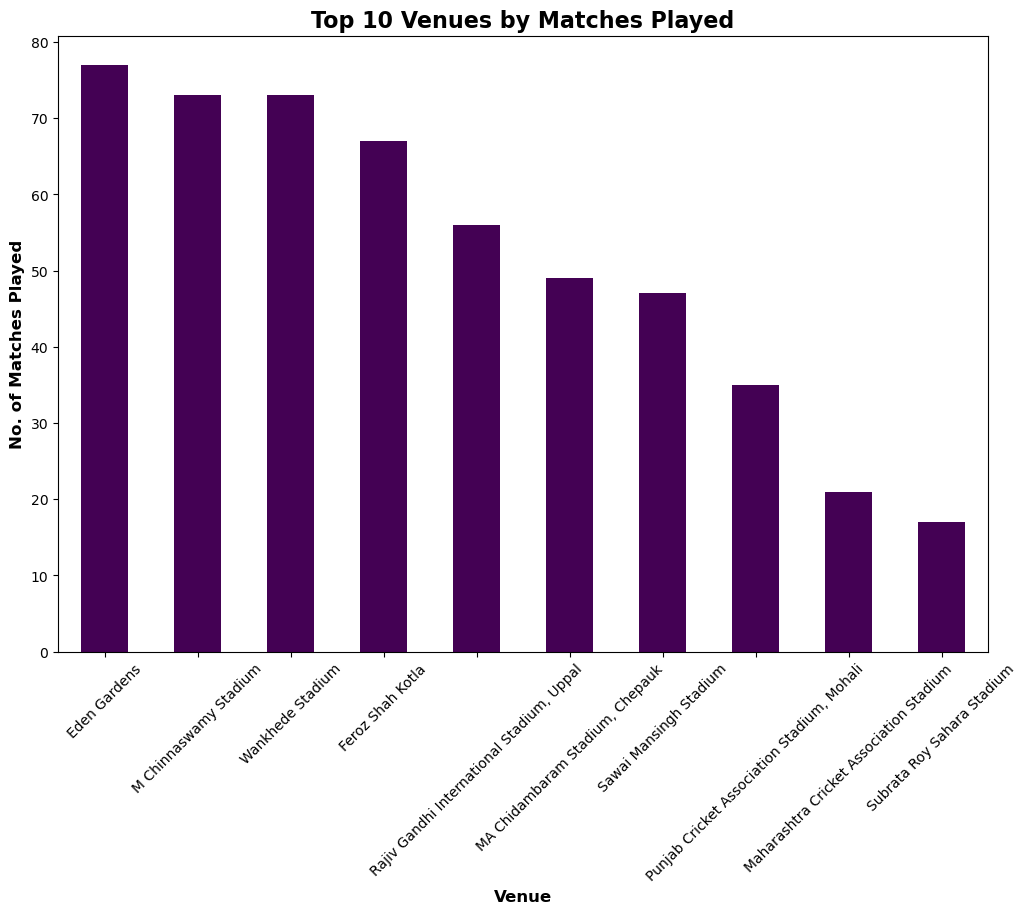

In [35]:
plt.figure(figsize=(12,8))
matches['venue'].value_counts().head(10).plot(kind='bar', cmap='viridis')
plt.title("Top 10 Venues by Matches Played", fontsize=16, fontweight='bold')
plt.xlabel("Venue", fontsize=12, fontweight='bold')
plt.ylabel("No. of Matches Played", fontsize=12, fontweight='bold')
plt.xticks(rotation=45)
plt.show()

##  Key Insight:
- **Mumbai Indians** is the most successful team (most wins).
- Toss winner won the match ~52% of the time.
- Most matches were played in **Eden Gardens**.

### Most Runs by a Player

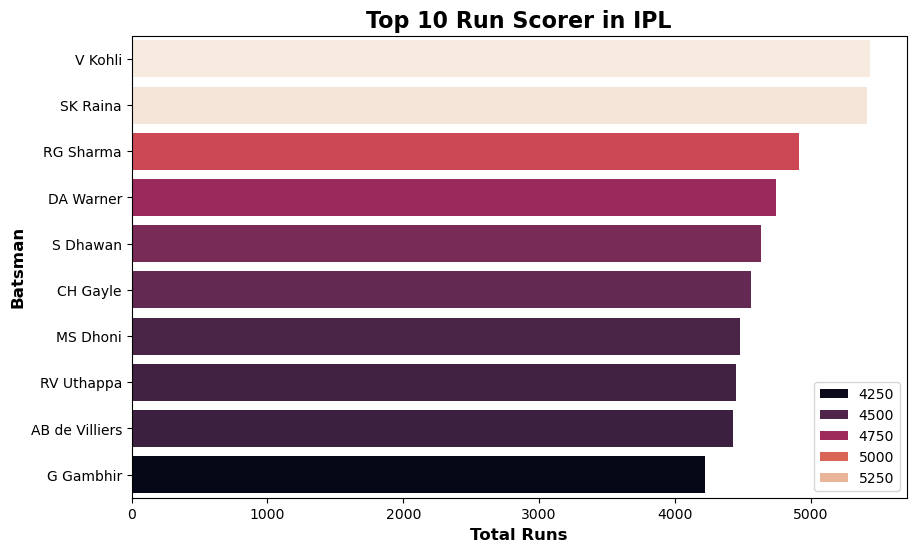

In [33]:
most_runs=deliveries.groupby('batsman')['batsman_runs'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=most_runs.values, y=most_runs.index,hue=most_runs.values, palette='rocket')
plt.title("Top 10 Run Scorer in IPL", fontsize=16, fontweight='bold')
plt.xlabel("Total Runs", fontsize=12, fontweight='bold')
plt.ylabel("Batsman", fontsize=12, fontweight='bold')
plt.show()

### Most Sixes

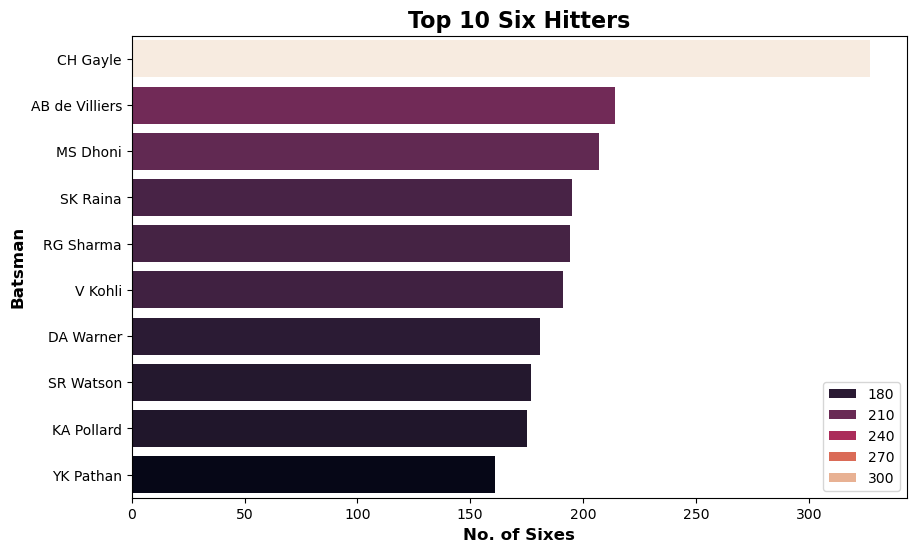

In [28]:
most_sixes=deliveries[deliveries['batsman_runs']==6]['batsman'].value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=most_sixes.values, y=most_sixes.index,hue=most_sixes.values, palette='rocket')
plt.title("Top 10 Six Hitters", fontsize=16, fontweight='bold')
plt.xlabel("No. of Sixes", fontsize=12, fontweight='bold')
plt.ylabel("Batsman", fontsize=12, fontweight='bold')
plt.show()

### Most Four

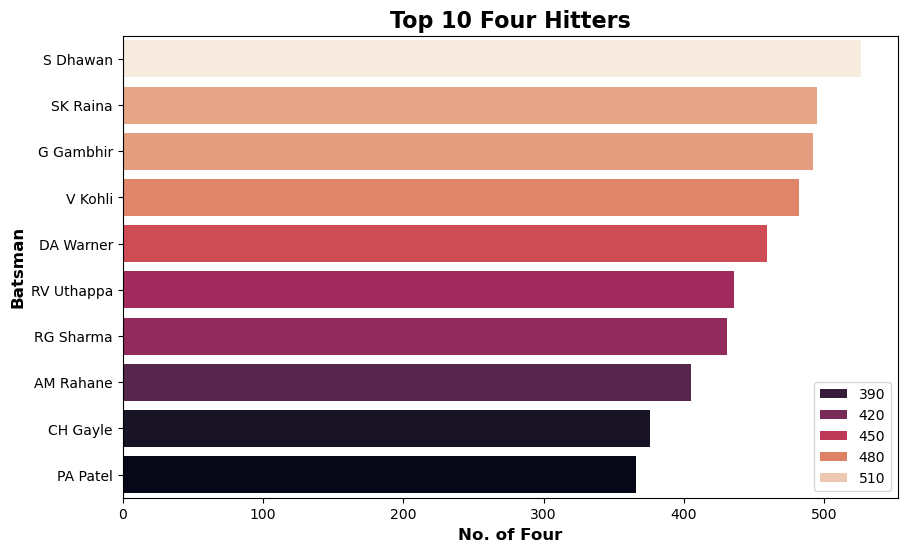

In [24]:
most_four=deliveries[deliveries['batsman_runs']==4]['batsman'].value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=most_four.values, y=most_four.index,hue=most_four.values, palette='rocket')
plt.title("Top 10 Four Hitters", fontsize=16,fontweight='bold')
plt.xlabel("No. of Four", fontsize=12,fontweight='bold')
plt.ylabel("Batsman", fontsize=12,fontweight='bold')
plt.show()

### Top Bowler by Wickets

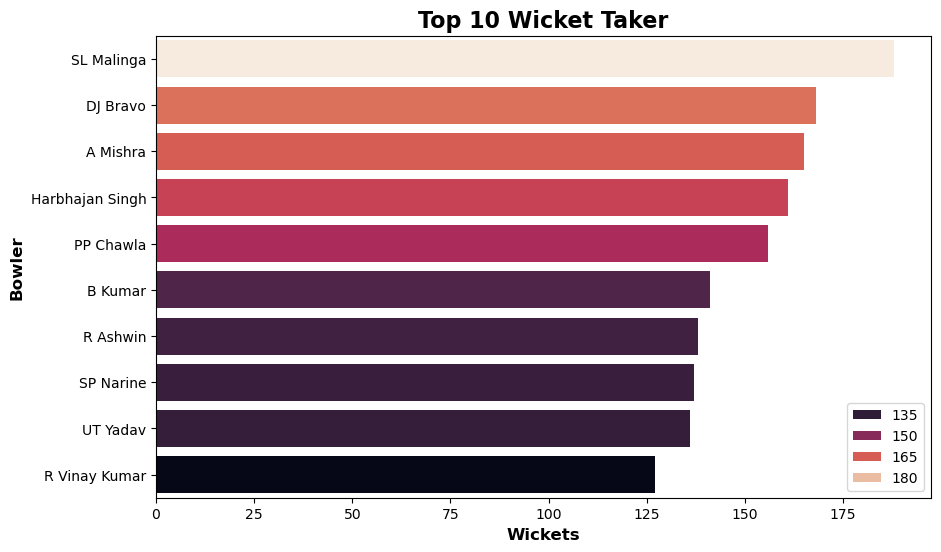

In [4]:
wickets=deliveries[deliveries['dismissal_kind'].notnull()]
top_bowlers=wickets.groupby('bowler')['player_dismissed'].count().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_bowlers.values, y=top_bowlers.index,hue=top_bowlers.values, palette='rocket')
plt.title("Top 10 Wicket Taker", fontsize=16,fontweight='bold')
plt.xlabel("Wickets", fontsize=12,fontweight='bold')
plt.ylabel("Bowler", fontsize=12,fontweight='bold')
plt.show()

### Strike Rate of Top 10 Run Scorer

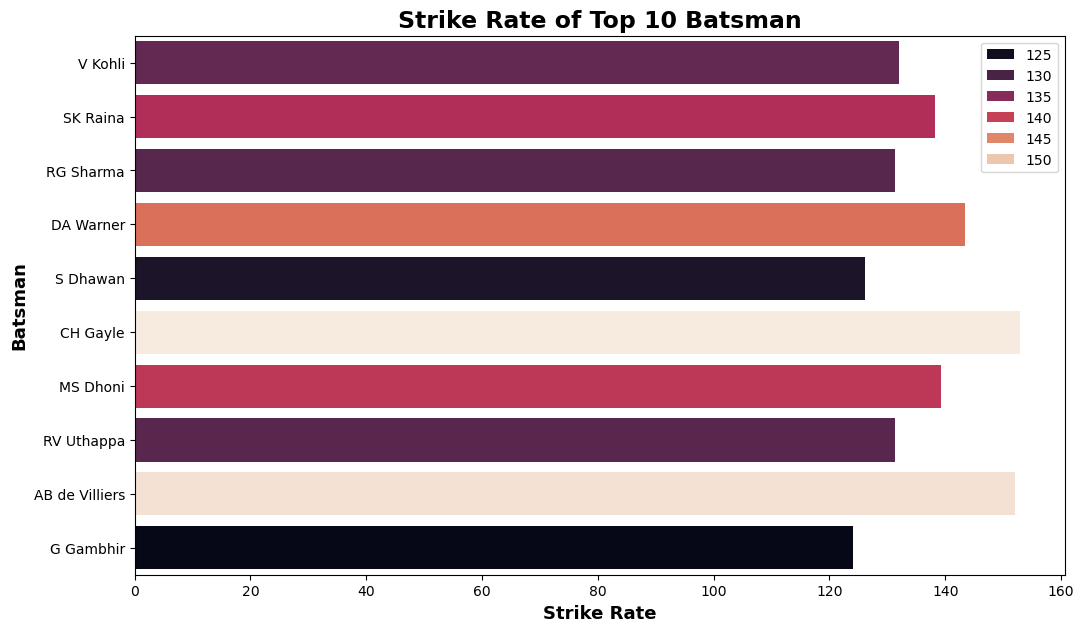

In [57]:
balls_faced=deliveries[deliveries['wide_runs']==0].groupby('batsman')['ball'].count().sort_values(ascending=False)
strike_rate= (most_runs/balls_faced[most_runs.index])*100
plt.figure(figsize=(12,7))
sns.barplot(x=strike_rate.values, y=strike_rate.index, hue=strike_rate.values,palette='rocket')
plt.title("Strike Rate of Top 10 Batsman", fontsize=17, fontweight='bold')
plt.xlabel("Strike Rate", fontsize=13,fontweight='bold')
plt.ylabel("Batsman", fontsize=13,fontweight='bold')
plt.show()

### Economy Rate of Top 10 Bowlers (by Wickets)

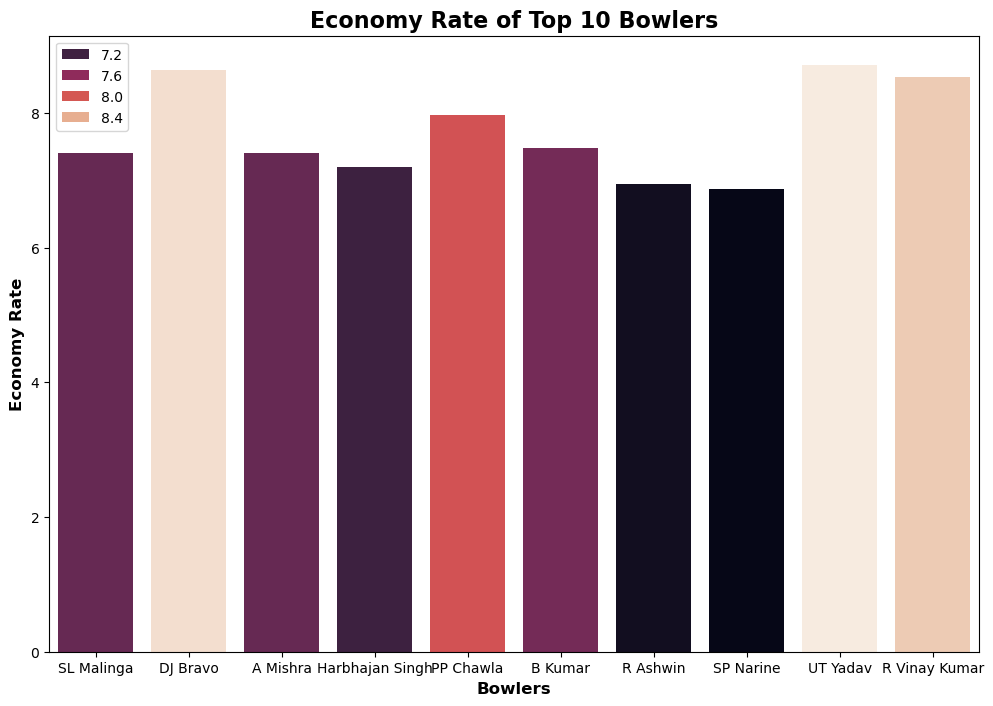

In [63]:
balls_bowled=deliveries[deliveries['wide_runs']==0].groupby('bowler')['ball'].count()
runs_conceded=deliveries.groupby('bowler')['total_runs'].sum()
economy_rate= (runs_conceded/(balls_bowled/6)).loc[top_bowlers.index]
plt.figure(figsize=(12,8))
sns.barplot(x=economy_rate.index, y=economy_rate.values,hue=economy_rate.values,  palette='rocket')
plt.title("Economy Rate of Top 10 Bowlers", fontsize=16, fontweight='bold')
plt.xlabel("Bowlers", fontsize=12, fontweight='bold')
plt.ylabel("Economy Rate", fontsize=12, fontweight='bold')
plt.show()

## Key Insights

### 1. Top Run Scorer:
- **Virat Kohli** has scored the most runs in IPL history, showing consistent performance across multiple season.

### 2. Power Hitters:
- **Chris Gayle** has his the highest number of sixes, reflecting his aggressive batting atyle.
- **Shikhar Dhawan** has the highest number of fours, highlighting his precision in finding gaps.

### 3. Top Bowlers:
- **Latish Malinga** is the highest wicket-taker, especially effective in death over.

### 4. Strike Rates:
- **AB de Villiers** has the highest strike rate among the top 10 batsmen, showcasing his dominance as a finisher.

### 5. Economy Rates:
- Bowlers like **Sunil Narine** and **Rashid Khan** have maintained exceptionally low economy rates, a valuable asset in the T20 format.

## Advanced Insights & Visualization

### 1. Toss Decision Trends

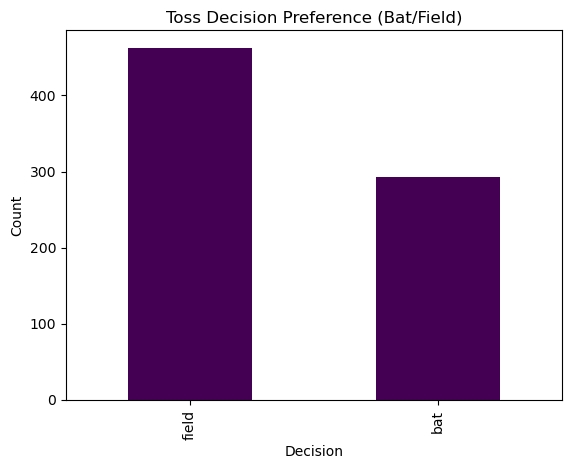

In [23]:
# Toss decision count
matches['toss_decision'].value_counts().plot(kind='bar', cmap='viridis')
plt.title("Toss Decision Preference (Bat/Field)")
plt.xlabel("Decision")
plt.ylabel("Count")
plt.show()

### Insight: 
- Fielding first has been the more popular choice over the years, possibly due to dew factor and chasing advantages.

### 2. Team Performance Over Seasons

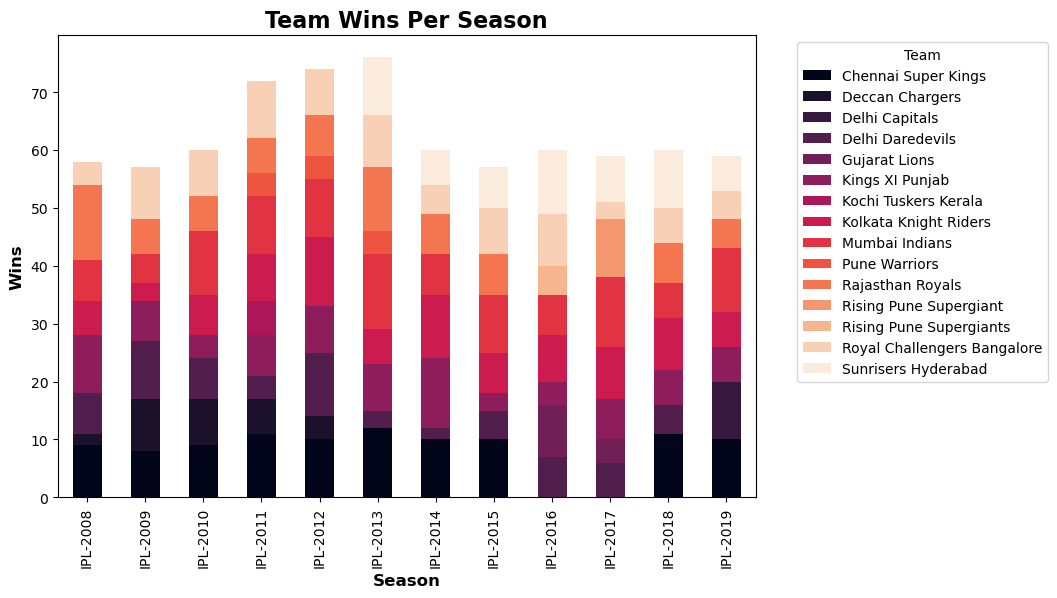

In [17]:
season_wins= matches.groupby(['Season','winner']).size().unstack().fillna(0)
season_wins.plot(kind='bar', stacked=True, figsize=(9,6), cmap='rocket')
plt.title("Team Wins Per Season", fontsize=16, fontweight='bold')
plt.xlabel("Season", fontsize=12, fontweight='bold')
plt.ylabel("Wins", fontsize=12, fontweight='bold')
plt.legend(title='Team', bbox_to_anchor=(1.05,1))
plt.show()

### Insight:
- **Mumbai Indians** and **Chennai Super Kings** dominate multiple season.

### 3. Most Player of the Match Awards.

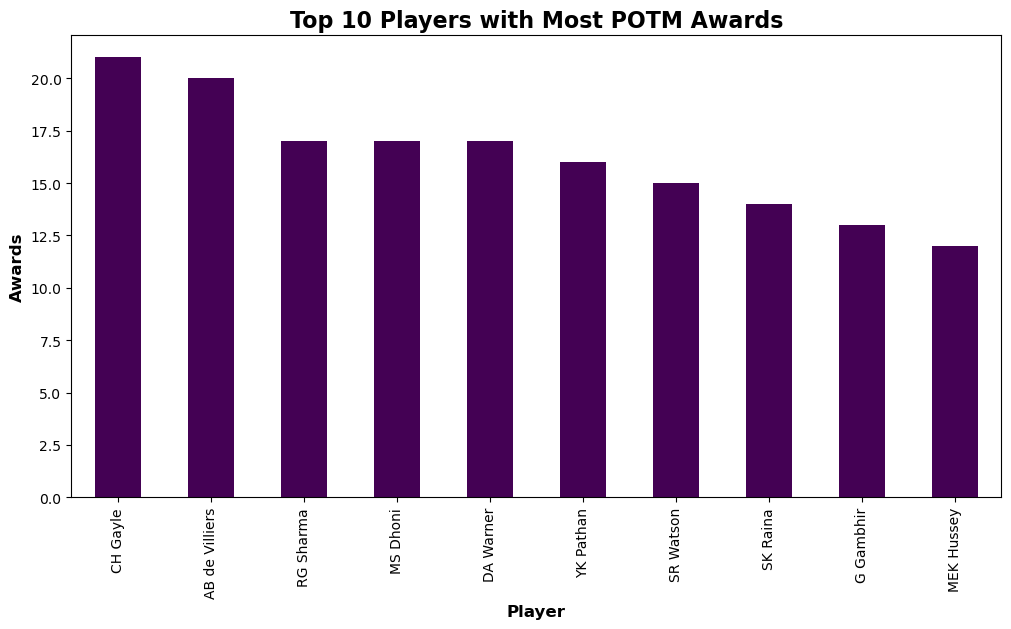

In [10]:
matches['player_of_match'].value_counts().head(10).plot(kind='bar', cmap='viridis', figsize=(12,6))

plt.title("Top 10 Players with Most POTM Awards", fontsize=16, fontweight='bold')
plt.xlabel("Player", fontsize=12, fontweight='bold')
plt.ylabel("Awards", fontsize=12, fontweight='bold')
plt.show()

### Insight:
- Players like **AB de Villiers** and **Chris Gayle** frequently turn matches single-handedly.

### 4. Highest Runs Scorer in a Single Season

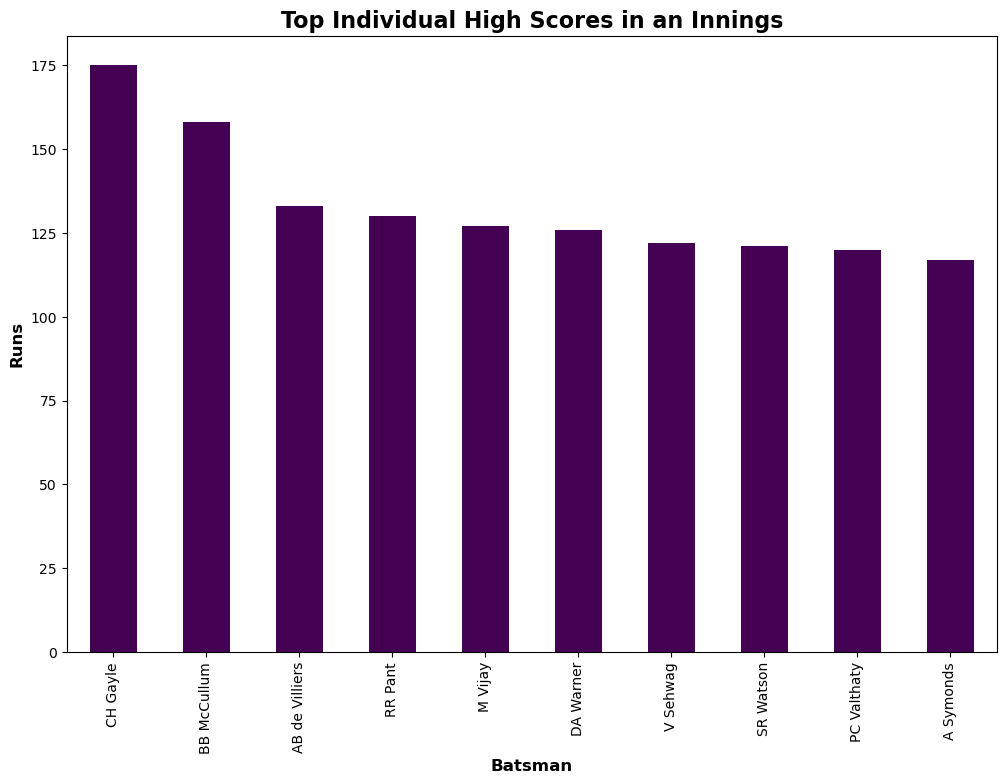

In [19]:
top_season_scorer = deliveries.groupby(['batsman','match_id'])['batsman_runs'].sum().reset_index()
top_season_scorer = top_season_scorer.groupby('batsman')['batsman_runs'].max().sort_values(ascending=False).head(10)
top_season_scorer.plot(kind='bar', cmap='viridis', figsize=(12,8))
plt.title("Top Individual High Scores in an Innings", fontsize=16, fontweight='bold')
plt.xlabel("Batsman", fontsize=12, fontweight='bold')
plt.ylabel("Runs", fontsize=12, fontweight='bold')
plt.show()

### 5. Runs by Over Analysis

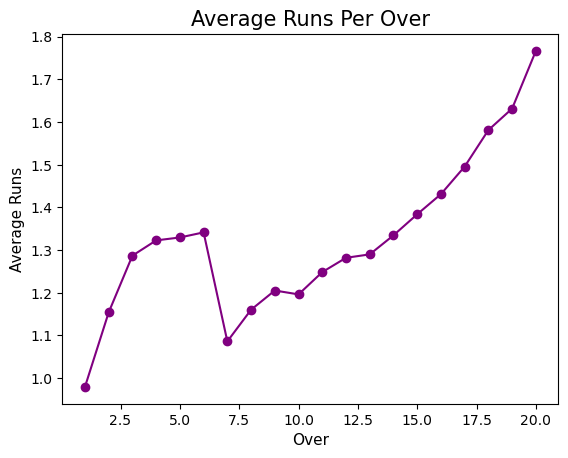

In [20]:
over_runs=deliveries.groupby('over')['total_runs'].mean()
over_runs.plot(kind='line', marker='o', color='purple')
plt.title("Average Runs Per Over", fontsize=15)
plt.xlabel("Over", fontsize=11)
plt.ylabel("Average Runs", fontsize=11)
plt.show()

### Insight:
- Last 5 overs (16-20) show a sharp spike in runs, indicating aggressive slog overs batting.

### 6. Wickets by Over

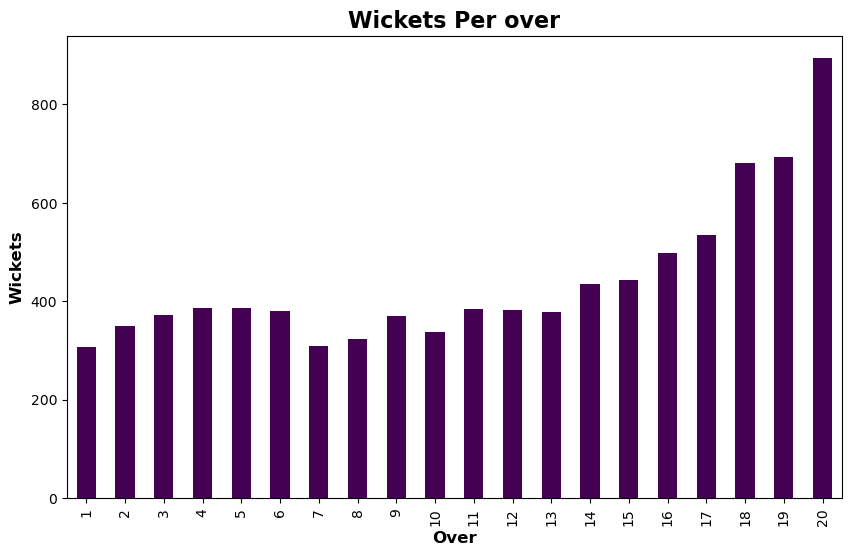

In [22]:
over_wickets=deliveries[deliveries['dismissal_kind'].notnull()].groupby('over')['dismissal_kind'].count()
over_wickets.plot(kind='bar', cmap='viridis', figsize=(10,6))
plt.title("Wickets Per over", fontsize=16, fontweight='bold')
plt.xlabel("Over", fontsize=12, fontweight='bold')
plt.ylabel("Wickets", fontsize=12, fontweight='bold')
plt.show()

### Insight:
- Last 3 overs (18-20) have the highest wicket-taking chances.

## Conclusion
1. **Mumbai Indians** won the highest number of matches in IPL history.
2. **Eden Garden** hosted the maximum matches overall.
3. Toss winners won **~52%** of the matches, showing toss has a slight advantage.
4. **Chris Gayle** scored the highest individual runs in a match.
5. Most matches were played in **Mumbai** and **Delhi** venues.
6. Last 4-5 overs show a sharp spike in runs.

##  Future Scope

- Use **machine learning models** to predict match outcomes based on toss, venue, and team stats.
- Perform **player performance prediction** to find emerging talents and consistent players.
- Build a **dashboard** using Power BI / Tableau for interactive IPL stats visualization.
- Analyze **ball-by-ball trends** for better strategy insights.
- Incorporate **weather and pitch data** for more accurate analysis.
- Compare IPL data with other T20 leagues to find performance patterns.
